In [35]:
import os, glob
print("cwd:", os.getcwd())
print("suspicious files:", [p for p in glob.glob("pandas*") if os.path.isfile(p)])


cwd: /kaggle/working
suspicious files: []


In [36]:
import pandas as pd, numpy as np
print("pandas", pd.__version__)
print("numpy", np.__version__)



pandas 2.2.2
numpy 2.4.1


In [37]:
!pip -q install ruptures==1.1.9
import ruptures as rpt
print("ruptures OK", rpt.__version__)

ruptures OK 1.1.9


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt
from statsmodels.multivariate.manova import MANOVA


In [39]:
!pip -q install --no-deps causalimpact

In [40]:
import glob, os, sys
import pandas as pd
import numpy as np

def find_one(filename):
    hits = glob.glob(f"/kaggle/input/**/{filename}", recursive=True)
    return hits[0] if hits else None

path_p1 = find_one("charts.csv")
path_p2 = find_one("top200jp2022_daily.csv")
path_p3 = find_one("universal_top_spotify_songs.csv")
path_features = find_one("dataset.csv")  # tracks-datasetのdataset.csvを拾う想定

print("p1:", path_p1)
print("p2:", path_p2)
print("p3:", path_p3)
print("features:", path_features)


p1: /kaggle/input/spotify-charts/charts.csv
p2: /kaggle/input/spotify-dataset-for-2022-japan-daily-top-200/top200jp2022_daily.csv
p3: /kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv
features: /kaggle/input/-spotify-tracks-dataset/dataset.csv


In [41]:
df_tmp = pd.read_csv(path_p3, nrows=5)
print(df_tmp.columns.tolist())
display(df_tmp.head())


['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms', 'album_name', 'album_release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


In [42]:
import pandas as pd
path_p2 = "/kaggle/input/spotify-dataset-for-2022-japan-daily-top-200/top200jp2022_daily.csv"
df2 = pd.read_csv(path_p2, nrows=5)
print(df2.columns.tolist())
display(df2.head())


['rank', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'days_on_chart', 'streams', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_genre', 'date']


,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genre,date
0,1,OFFICIAL HIGE DANDISM,Subtitle,IRORI Records,1,1,82,388464,0.649,0.683,...,0.0424,0.03130,0.000000,0.1180,0.381,130.000,305509,4,"['anime', 'anime rock', 'j-pop']",2022/12/31
1,2,Kenshi Yonezu,KICK BACK,Sony Music Labels Inc.,1,2,82,297097,0.577,0.941,...,0.1050,0.00207,0.000003,0.0891,0.292,101.921,193495,4,"['anime', 'j-pop']",2022/12/31
2,3,Tani Yuuki,W / X / Y,Valley Records,1,3,371,239416,0.628,0.775,...,0.0535,0.15900,0.000000,0.3300,0.674,106.382,278119,3,"['j-pop', 'japanese teen pop']",2022/12/31
3,4,Ado,新時代,Universal Music LLC,1,5,207,236702,0.490,0.987,...,0.2530,0.04900,0.000003,0.4060,0.451,175.064,226813,4,"['j-pop', 'japanese teen pop']",2022/12/31
4,5,natori,Overdose,なとり,2,4,111,221872,0.733,0.598,...,0.0377,0.03070,0.000017,0.2180,0.831,118.012,197094,4,['japanese teen pop'],2022/12/31


In [43]:
import glob, os
import pandas as pd

# 2022ファイルを探す
hits = glob.glob("/kaggle/input/**/top200jp2022_daily.csv", recursive=True)
print("hits:", hits[:5], " ... total:", len(hits))

if len(hits) == 0:
    raise FileNotFoundError("top200jp2022_daily.csv が /kaggle/input 配下に見つかりません。Add data で 2022 dataset を追加してください。")

path_p2 = hits[0]
print("Using:", path_p2)

df_p2 = pd.read_csv(path_p2)
print("Phase II loaded:", len(df_p2))
print("columns:", df_p2.columns.tolist())
display(df_p2.head())


hits: ['/kaggle/input/spotify-dataset-for-2022-japan-daily-top-200/top200jp2022_daily.csv']  ... total: 1
Using: /kaggle/input/spotify-dataset-for-2022-japan-daily-top-200/top200jp2022_daily.csv
Phase II loaded: 73000
columns: ['rank', 'artist_names', 'track_name', 'source', 'peak_rank', 'previous_rank', 'days_on_chart', 'streams', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'artist_genre', 'date']


,rank,artist_names,track_name,source,peak_rank,previous_rank,days_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_genre,date
0,1,OFFICIAL HIGE DANDISM,Subtitle,IRORI Records,1,1,82,388464,0.649,0.683,...,0.0424,0.03130,0.000000,0.1180,0.381,130.000,305509,4,"['anime', 'anime rock', 'j-pop']",2022/12/31
1,2,Kenshi Yonezu,KICK BACK,Sony Music Labels Inc.,1,2,82,297097,0.577,0.941,...,0.1050,0.00207,0.000003,0.0891,0.292,101.921,193495,4,"['anime', 'j-pop']",2022/12/31
2,3,Tani Yuuki,W / X / Y,Valley Records,1,3,371,239416,0.628,0.775,...,0.0535,0.15900,0.000000,0.3300,0.674,106.382,278119,3,"['j-pop', 'japanese teen pop']",2022/12/31
3,4,Ado,新時代,Universal Music LLC,1,5,207,236702,0.490,0.987,...,0.2530,0.04900,0.000003,0.4060,0.451,175.064,226813,4,"['j-pop', 'japanese teen pop']",2022/12/31
4,5,natori,Overdose,なとり,2,4,111,221872,0.733,0.598,...,0.0377,0.03070,0.000017,0.2180,0.831,118.012,197094,4,['japanese teen pop'],2022/12/31


In [44]:
import glob
import pandas as pd
import numpy as np

# -----------------------------
# 0) パス自動検出
# -----------------------------
def find_one(filename):
    hits = glob.glob(f"/kaggle/input/**/{filename}", recursive=True)
    return hits[0] if hits else None

path_p1   = find_one("charts.csv")
path_p2   = find_one("top200jp2022_daily.csv")
path_p3   = find_one("universal_top_spotify_songs.csv")
path_feat = find_one("dataset.csv")   # -spotify-tracks-dataset/dataset.csv を拾う想定

print("p1:", path_p1)
print("p2:", path_p2)
print("p3:", path_p3)
print("feat:", path_feat)

# -----------------------------
# 1) 共通：加重平均（日次）
# -----------------------------
target_cols = ["valence","energy","tempo","danceability","acousticness"]

def weighted_daily(df, date_col, weight_col, cols):
    cols = [c for c in cols if c in df.columns]
    d = df.dropna(subset=[date_col, weight_col]).copy()
    d[weight_col] = pd.to_numeric(d[weight_col], errors="coerce")
    for c in cols:
        d[c] = pd.to_numeric(d[c], errors="coerce")

    def wmean(g):
        w = g[weight_col].values
        out = {}
        for c in cols:
            x = g[c].values
            m = np.isfinite(x) & np.isfinite(w) & (w > 0)
            out[c] = np.average(x[m], weights=w[m]) if m.sum() else np.nan
        return pd.Series(out)

    return d.groupby(date_col).apply(wmean)

# -----------------------------
# 2) Phase I (2017-2021): charts.csv (streamsあり、featuresは辞書から付与)
# -----------------------------
df_p1 = pd.read_csv(path_p1)
df_p1 = df_p1[df_p1["region"].astype(str).str.lower().isin(["jp","japan","jpn"])].copy()

df_p1["Date"] = pd.to_datetime(df_p1["date"], errors="coerce")
df_p1["Streams"] = pd.to_numeric(df_p1["streams"], errors="coerce")
df_p1["track_id"] = df_p1["url"].astype(str).str.split("/").str[-1].str.split("?").str[0]
df_p1 = df_p1.dropna(subset=["Date","Streams","track_id"])
print("Phase I rows:", len(df_p1))

# features辞書
df_feat = pd.read_csv(path_feat)
if "track_id" not in df_feat.columns and "id" in df_feat.columns:
    df_feat = df_feat.rename(columns={"id":"track_id"})

use_cols = [c for c in ["track_id"] + target_cols if c in df_feat.columns]
df_feat = df_feat[use_cols].drop_duplicates("track_id").copy()
for c in target_cols:
    if c in df_feat.columns:
        df_feat[c] = pd.to_numeric(df_feat[c], errors="coerce")

df_p1m = pd.merge(df_p1[["Date","track_id","Streams"]], df_feat, on="track_id", how="inner")
print("Phase I merged rows:", len(df_p1m))

daily_p1 = weighted_daily(df_p1m, "Date", "Streams", target_cols)

# -----------------------------
# 3) Phase II (2022): 既に streams + features 入り
# -----------------------------
df_p2 = pd.read_csv(path_p2)
df_p2 = df_p2.rename(columns={"date":"Date", "streams":"Streams"})
df_p2["Date"] = pd.to_datetime(df_p2["Date"], errors="coerce")
df_p2["Streams"] = pd.to_numeric(df_p2["Streams"], errors="coerce")
df_p2 = df_p2.dropna(subset=["Date","Streams"])
print("Phase II rows:", len(df_p2))

daily_p2 = weighted_daily(df_p2, "Date", "Streams", target_cols)

# -----------------------------
# 4) Phase III (2023-2025): streams無し → rank重み（1位200…200位1）
# -----------------------------
df_p3 = pd.read_csv(path_p3)
df_p3 = df_p3[df_p3["country"].astype(str).str.lower().isin(["jp","japan","jpn"])].copy()

df_p3["Date"] = pd.to_datetime(df_p3["snapshot_date"], errors="coerce")
df_p3["daily_rank"] = pd.to_numeric(df_p3["daily_rank"], errors="coerce")
df_p3 = df_p3[df_p3["daily_rank"].between(1,200)].copy()

df_p3["RankWeight"] = 201 - df_p3["daily_rank"]
df_p3 = df_p3.dropna(subset=["Date","RankWeight"])
print("Phase III rows:", len(df_p3))

daily_p3 = weighted_daily(df_p3, "Date", "RankWeight", target_cols)

# -----------------------------
# 5) 結合して日次系列へ
# -----------------------------
df_daily = pd.concat([daily_p1, daily_p2, daily_p3]).sort_index()

# 連続日付化 + 補間（解析用）
df_daily = df_daily.asfreq("D").interpolate("time").dropna()

print("df_daily:", df_daily.shape, "from", df_daily.index.min().date(), "to", df_daily.index.max().date())
display(df_daily.head())
display(df_daily.tail())


p1: /kaggle/input/spotify-charts/charts.csv
p2: /kaggle/input/spotify-dataset-for-2022-japan-daily-top-200/top200jp2022_daily.csv
p3: /kaggle/input/top-spotify-songs-in-73-countries-daily-updated/universal_top_spotify_songs.csv
feat: /kaggle/input/-spotify-tracks-dataset/dataset.csv
Phase I rows: 356774
Phase I merged rows: 70758
Phase II rows: 73000
Phase III rows: 29155
df_daily: (3084, 5) from 2017-01-01 to 2025-06-11


,valence,energy,tempo,danceability,acousticness
Date,,,,,
2017-01-01,0.518401,0.700382,111.538485,0.603002,0.239856
2017-01-02,0.528157,0.707940,112.023554,0.611759,0.242102
2017-01-03,0.529481,0.708715,111.414890,0.611685,0.253630
2017-01-04,0.531191,0.714499,112.041689,0.611369,0.245812
2017-01-05,0.527938,0.718385,112.793081,0.608232,0.244621


,valence,energy,tempo,danceability,acousticness
Date,,,,,
2025-06-07,0.635484,0.763054,125.680626,0.616455,0.115224
2025-06-08,0.638252,0.765667,121.929636,0.624769,0.108470
2025-06-09,0.623835,0.764249,123.882436,0.610413,0.111581
2025-06-10,0.624101,0.765790,124.243791,0.615912,0.106970
2025-06-11,0.623913,0.761351,123.982229,0.611115,0.110986


PCA explained variance ratio (PC1, PC2): [0.73567382 0.13273   ]


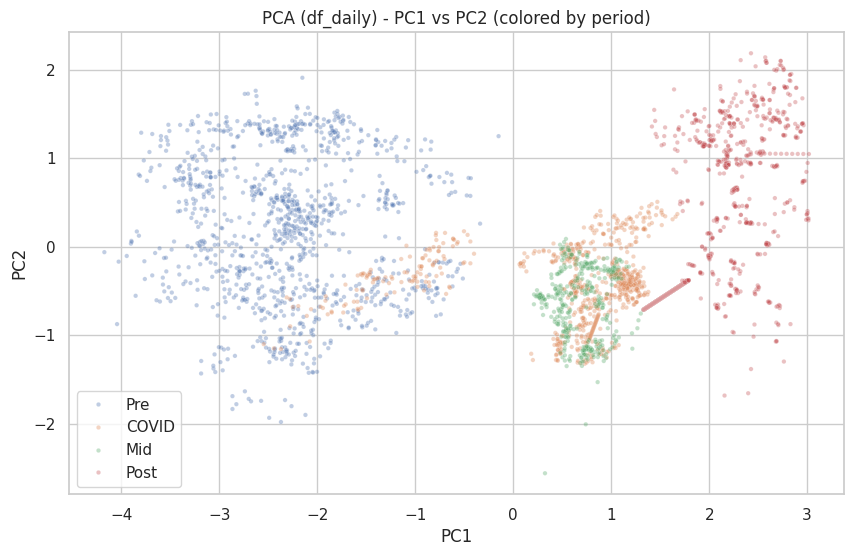


Loadings (absolute sorted by PC1):


,PC1_loading,PC2_loading
energy,0.500632,-0.002347
tempo,0.486896,-0.117618
valence,0.434015,0.207212
danceability,-0.402745,0.724273
acousticness,-0.402153,-0.647033



Loadings (absolute sorted by PC2):


,PC1_loading,PC2_loading
danceability,-0.402745,0.724273
acousticness,-0.402153,-0.647033
valence,0.434015,0.207212
tempo,0.486896,-0.117618
energy,0.500632,-0.002347


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA対象列（存在するもののみ）
cols = [c for c in ["valence","energy","tempo","danceability","acousticness"] if c in df_daily.columns]
X = df_daily[cols].dropna()

# 標準化 → PCA
Xz = StandardScaler().fit_transform(X.values)
pca = PCA(n_components=min(5, len(cols)))
Z = pca.fit_transform(Xz)

df_pca = pd.DataFrame(Z[:, :2], columns=["PC1","PC2"], index=X.index)
df_pca["Year"] = df_pca.index.year

def period3(y):
    if y <= 2019:
        return "Pre"
    elif 2020 <= y <= 2021:
        return "COVID"
    elif y == 2022:
        return "Mid"
    else:
        return "Post"

df_pca["Period"] = df_pca["Year"].map(period3)

# 寄与率
print("PCA explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_[:2])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Period", alpha=0.35, s=10)
plt.title("PCA (df_daily) - PC1 vs PC2 (colored by period)")
plt.legend()
plt.show()

# 負荷量（どの変数が効いているか）
loadings = pd.DataFrame(
    pca.components_.T[:, :2],
    index=cols,
    columns=["PC1_loading","PC2_loading"]
)

print("\nLoadings (absolute sorted by PC1):")
display(loadings.reindex(loadings["PC1_loading"].abs().sort_values(ascending=False).index))

print("\nLoadings (absolute sorted by PC2):")
display(loadings.reindex(loadings["PC2_loading"].abs().sort_values(ascending=False).index))


In [46]:
from statsmodels.multivariate.manova import MANOVA

df_manova = df_daily.reset_index().rename(columns={"index":"Date"})
df_manova["Year"] = df_manova["Date"].dt.year

def period3(y):
    if y <= 2019:
        return "Pre"
    elif 2020 <= y <= 2021:
        return "COVID"
    elif y == 2022:
        return "Mid"
    else:
        return "Post"

df_manova["Period"] = df_manova["Year"].apply(period3)

# 従属変数（存在する列だけ）
dep = [c for c in ["valence","energy","tempo","danceability","acousticness"] if c in df_manova.columns]

# MANOVAは従属変数が2つ以上必要
if len(dep) < 2:
    raise ValueError("MANOVAには従属変数が2つ以上必要です。df_dailyの列を確認してください。")

formula = " + ".join(dep) + " ~ Period"
manova = MANOVA.from_formula(formula, data=df_manova)

print("MANOVA formula:", formula)
print(manova.mv_test())
print("\n-> Pillai's trace の Pr > F を中心に確認してください（頑健寄り）。")


MANOVA formula: valence + energy + tempo + danceability + acousticness ~ Period
                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept          Value   Num DF   Den DF    F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda    0.0005 5.0000 3076.0000 1264865.7600 0.0000
         Pillai's trace    0.9995 5.0000 3076.0000 1264865.7600 0.0000
 Hotelling-Lawley trace 2056.0237 5.0000 3076.0000 1264865.7600 0.0000
    Roy's greatest root 2056.0237 5.0000 3076.0000 1264865.7600 0.0000
----------------------------------------------------------------------
                                                                      
-----------------------------------------------------------------------
          Period          Value    Num DF    Den DF    F Value   Pr > F
------------------

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# df_manova（MANOVAで使ったやつ）を再利用できる前提。無ければ作り直し：
df_post = df_daily.reset_index().rename(columns={"index":"Date"})
df_post["Year"] = df_post["Date"].dt.year

def period3(y):
    if y <= 2019: return "Pre"
    if 2020 <= y <= 2021: return "COVID"
    if y == 2022: return "Mid"
    return "Post"

df_post["Period"] = df_post["Year"].apply(period3)

cols = [c for c in ["valence","energy","tempo","danceability","acousticness"] if c in df_post.columns]

# (A) 記述統計：期間別平均
display(df_post.groupby("Period")[cols].agg(["mean","std","count"]))

# (B) 変数ごと：ANOVA + Tukey
for y in cols:
    print("\n====================")
    print("Variable:", y)

    model = ols(f"{y} ~ C(Period)", data=df_post).fit()
    aov = sm.stats.anova_lm(model, typ=2)
    display(aov)

    tuk = pairwise_tukeyhsd(endog=df_post[y], groups=df_post["Period"], alpha=0.05)
    print(tuk.summary())


valence                    energy                       tempo  \
            mean       std count      mean       std count        mean   
Period                                                                   
COVID   0.593924  0.018244   731  0.744348  0.026239   731  125.095457   
Mid     0.594354  0.011786   365  0.738714  0.010077   365  126.348273   
Post    0.625217  0.025544   893  0.768934  0.013026   893  129.124393   
Pre     0.529326  0.039822  1095  0.675164  0.021459  1095  116.334749   

                       danceability                 acousticness            \
             std count         mean       std count         mean       std   
Period                                                                       
COVID   3.847227   731     0.611123  0.008413   731     0.172181  0.019731   
Mid     1.533183   365     0.604974  0.008423   365     0.172842  0.009801   
Post    1.884518   893     0.605637  0.014761   893     0.125020  0.023621   
Pre     2.325354  1095     0.646541  0.021268  1095     0.189201  0.025913   

              
       count  
Period        
COVID    731  
Mid      365  
Post     893  
Pre     1095


Variable: valence


,sum_sq,df,F,PR(>F)
C(Period),4.854438,3.0,1909.26588,0.0
Residual,2.610370,3080.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 COVID    Mid   0.0004 0.9957 -0.0044  0.0052  False
 COVID   Post   0.0313    0.0  0.0276   0.035   True
 COVID    Pre  -0.0646    0.0 -0.0682  -0.061   True
   Mid   Post   0.0309    0.0  0.0262  0.0355   True
   Mid    Pre   -0.065    0.0 -0.0696 -0.0605   True
  Post    Pre  -0.0959    0.0 -0.0993 -0.0925   True
----------------------------------------------------

Variable: energy


,sum_sq,df,F,PR(>F)
C(Period),4.780893,3.0,4108.52211,0.0
Residual,1.194683,3080.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 COVID    Mid  -0.0056   0.0 -0.0089 -0.0024   True
 COVID   Post   0.0246   0.0  0.0221  0.0271   True
 COVID    Pre  -0.0692   0.0 -0.0716 -0.0668   True
   Mid   Post   0.0302   0.0  0.0271  0.0334   True
   Mid    Pre  -0.0636   0.0 -0.0666 -0.0605   True
  Post    Pre  -0.0938   0.0 -0.0961 -0.0915   True
---------------------------------------------------

Variable: tempo


,sum_sq,df,F,PR(>F)
C(Period),89165.417350,3.0,4413.019192,0.0
Residual,20743.884818,3080.0,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 COVID    Mid   1.2528   0.0   0.8253   1.6804   True
 COVID   Post   4.0289   0.0   3.6962   4.3617   True
 COVID    Pre  -8.7607   0.0  -9.0793  -8.4421   True
   Mid   Post   2.7761   0.0   2.3617   3.1905   True
   Mid    Pre -10.0135   0.0 -10.4167  -9.6103   True
  Post    Pre -12.7896   0.0 -13.0904 -12.4889   True
-----------------------------------------------------

Variable: danceability


,sum_sq,df,F,PR(>F)
C(Period),1.089678,3.0,1459.141389,0.0
Residual,0.766708,3080.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 COVID    Mid  -0.0061    0.0 -0.0087 -0.0035   True
 COVID   Post  -0.0055    0.0 -0.0075 -0.0035   True
 COVID    Pre   0.0354    0.0  0.0335  0.0374   True
   Mid   Post   0.0007 0.9061 -0.0019  0.0032  False
   Mid    Pre   0.0416    0.0  0.0391   0.044   True
  Post    Pre   0.0409    0.0  0.0391  0.0427   True
----------------------------------------------------

Variable: acousticness


,sum_sq,df,F,PR(>F)
C(Period),2.128443,3.0,1408.495488,0.0
Residual,1.551444,3080.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 COVID    Mid   0.0007 0.9678  -0.003  0.0044  False
 COVID   Post  -0.0472    0.0   -0.05 -0.0443   True
 COVID    Pre    0.017    0.0  0.0143  0.0198   True
   Mid   Post  -0.0478    0.0 -0.0514 -0.0442   True
   Mid    Pre   0.0164    0.0  0.0129  0.0198   True
  Post    Pre   0.0642    0.0  0.0616  0.0668   True
----------------------------------------------------



Change Point Detection: Valence change points (pen=3):
 - 2017-01-27
 - 2017-05-02
 - 2017-10-04
 - 2018-01-02
 - 2018-01-17
 - 2018-02-21
 - 2018-04-12
 - 2018-04-27
 - 2018-12-03
 - 2019-01-02
 - 2019-02-11
 - 2019-05-02
 - 2019-06-06
 - 2019-07-16
 - 2019-08-15
 - 2019-10-09
 - 2019-12-08
 - 2020-01-02
 - 2020-02-26
 - 2020-05-01
 - 2020-05-21
 - 2020-08-09
 - 2020-10-18
 - 2021-01-16
 - 2021-06-30
 - 2021-08-29
 - 2021-10-18
 - 2022-04-26
 - 2022-10-28
 - 2023-04-01
 - 2023-07-15
 - 2023-10-28
 - 2023-12-27
 - 2024-04-10
 - 2024-06-24
 - 2024-10-12


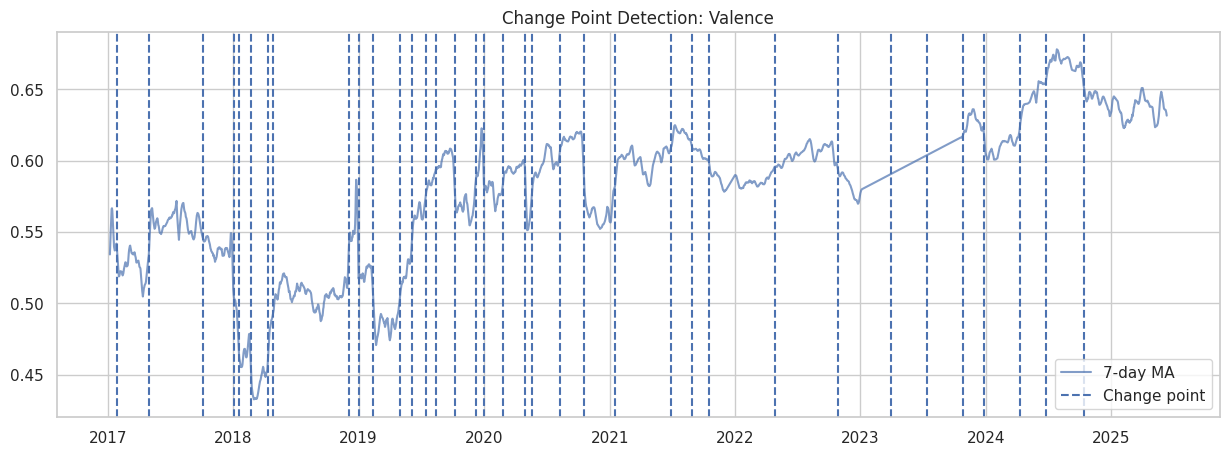


Change Point Detection: Energy change points (pen=3):
 - 2017-03-03
 - 2017-07-21
 - 2017-09-29
 - 2017-12-03
 - 2018-02-11
 - 2018-04-02
 - 2018-04-22
 - 2018-05-27
 - 2018-12-08
 - 2019-01-02
 - 2019-03-03
 - 2019-04-02
 - 2019-05-02
 - 2019-08-10
 - 2019-11-18
 - 2019-12-23
 - 2020-01-27
 - 2020-03-07
 - 2020-04-01
 - 2020-05-16
 - 2020-11-22
 - 2021-01-16
 - 2021-08-14
 - 2021-12-07
 - 2021-12-27
 - 2022-07-20
 - 2023-01-01
 - 2023-11-02
 - 2024-07-04
 - 2024-08-28
 - 2024-12-26
 - 2025-02-19
 - 2025-05-05


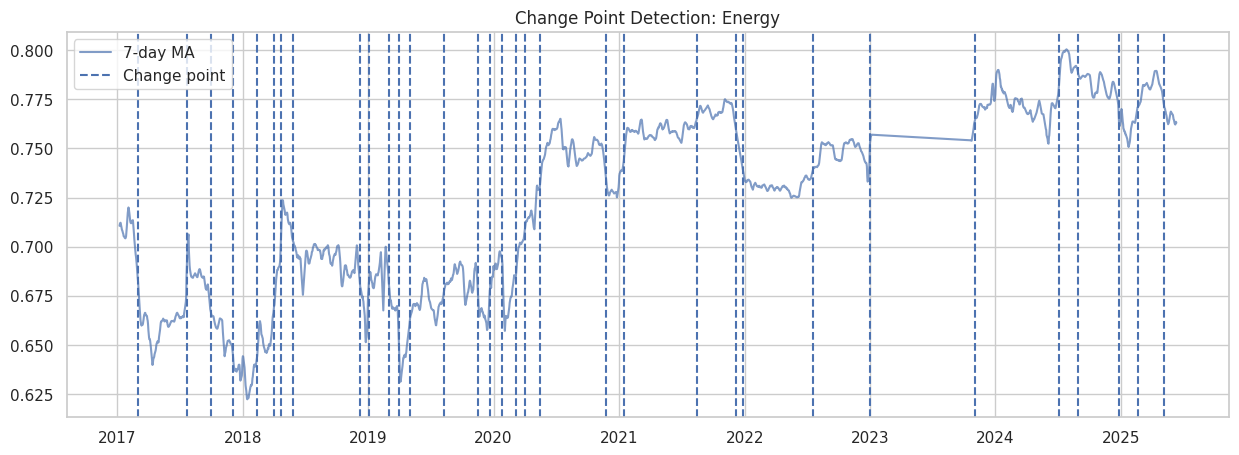

In [48]:
import ruptures as rpt

def changepoint_plot(series, title, pen=3):
    s = series.rolling(7).mean().dropna()
    signal = s.values
    dates = s.index

    if len(signal) < 90:
        print(f"{title}: Not enough data points ({len(signal)})")
        return

    algo = rpt.Pelt(model="rbf").fit(signal)
    res = algo.predict(pen=pen)
    cps = [r for r in res if r < len(dates)]

    print(f"\n{title} change points (pen={pen}):")
    for r in cps:
        print(" -", dates[r].date())

    plt.figure(figsize=(15,5))
    plt.plot(dates, signal, alpha=0.7, label="7-day MA")
    first = True
    for r in cps:
        plt.axvline(dates[r], linestyle="--", linewidth=1.5, label="Change point" if first else None)
        first = False
    plt.title(title)
    plt.legend()
    plt.show()

# valence
if "valence" in df_daily.columns:
    changepoint_plot(df_daily["valence"], "Change Point Detection: Valence", pen=3)
else:
    print("df_dailyに valence 列がありません。")

# energy
if "energy" in df_daily.columns:
    changepoint_plot(df_daily["energy"], "Change Point Detection: Energy", pen=3)
else:
    print("df_dailyに energy 列がありません。")



Change Point Detection: Valence change points (pen=6):
 - 2017-05-02
 - 2017-10-04
 - 2018-01-02
 - 2018-01-17
 - 2018-04-17
 - 2018-12-03
 - 2019-01-02
 - 2019-02-11
 - 2019-05-02
 - 2019-06-06
 - 2019-07-21
 - 2019-10-09
 - 2019-12-08
 - 2020-06-25
 - 2020-10-18
 - 2021-01-16
 - 2021-06-05
 - 2021-10-18
 - 2022-04-26
 - 2022-10-28
 - 2023-04-11
 - 2023-08-09
 - 2024-04-15
 - 2024-06-24
 - 2024-10-12


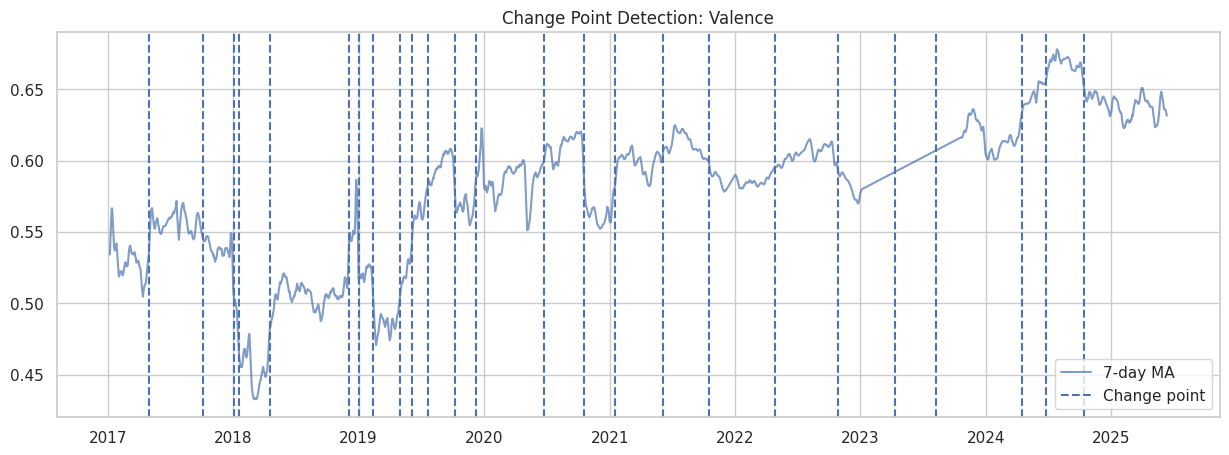


Change Point Detection: Energy change points (pen=6):
 - 2017-03-03
 - 2017-07-21
 - 2017-09-29
 - 2017-12-03
 - 2018-02-11
 - 2018-04-07
 - 2018-10-14
 - 2019-03-28
 - 2019-05-02
 - 2020-03-12
 - 2020-05-16
 - 2020-11-22
 - 2021-01-16
 - 2021-08-14
 - 2021-12-17
 - 2022-08-04
 - 2023-11-02
 - 2024-07-04
 - 2024-12-21
 - 2025-02-19


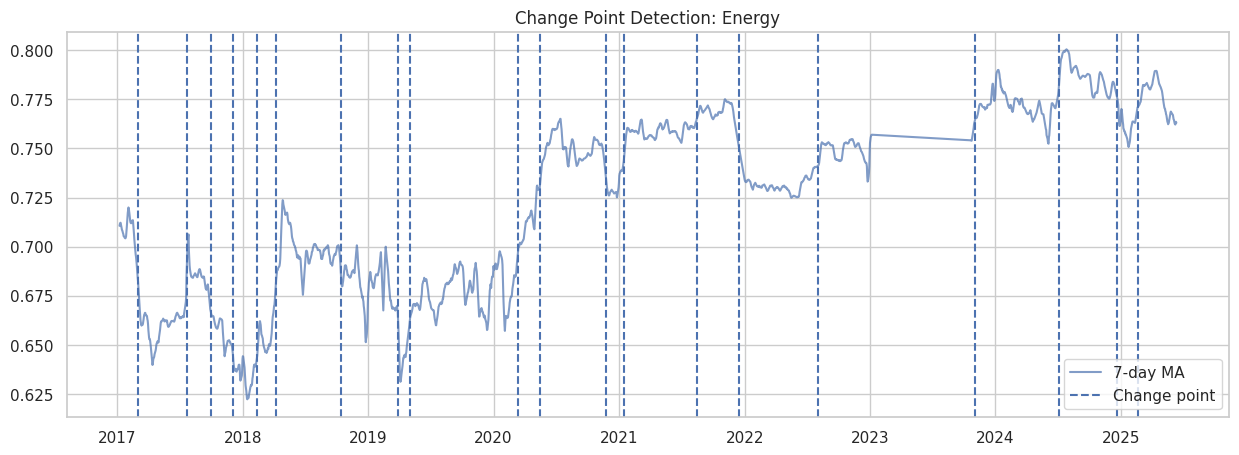

In [49]:
# valence
if "valence" in df_daily.columns:
    changepoint_plot(df_daily["valence"], "Change Point Detection: Valence", pen=6)
else:
    print("df_dailyに valence 列がありません。")

# energy
if "energy" in df_daily.columns:
    changepoint_plot(df_daily["energy"], "Change Point Detection: Energy", pen=6)
else:
    print("df_dailyに energy 列がありません。")



Change Point Detection: Valence change points (pen=10):
 - 2017-05-02
 - 2017-10-04
 - 2018-01-02
 - 2018-01-17
 - 2018-04-17
 - 2018-12-03
 - 2019-02-11
 - 2019-05-02
 - 2019-06-06
 - 2019-07-21
 - 2019-10-09
 - 2019-12-08
 - 2020-06-25
 - 2020-10-18
 - 2021-01-16
 - 2021-10-18
 - 2022-04-26
 - 2022-10-28
 - 2023-06-15
 - 2024-04-15
 - 2024-06-24
 - 2024-10-12


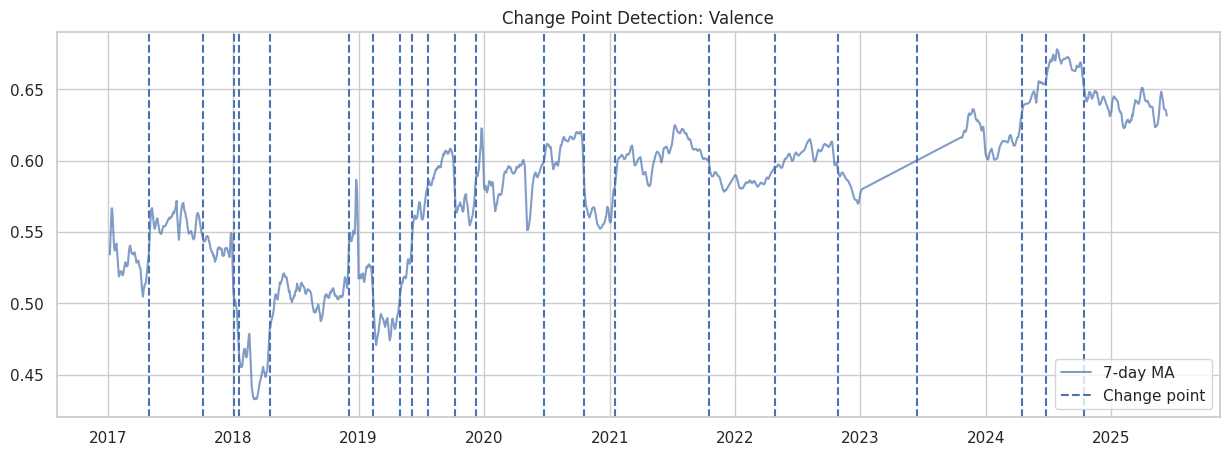


Change Point Detection: Energy change points (pen=10):
 - 2017-03-03
 - 2017-07-21
 - 2017-09-29
 - 2018-04-07
 - 2018-10-14
 - 2019-03-28
 - 2019-05-02
 - 2020-03-12
 - 2020-05-16
 - 2020-11-22
 - 2021-01-16
 - 2021-12-22
 - 2022-08-04
 - 2023-11-02
 - 2024-07-04
 - 2024-11-16


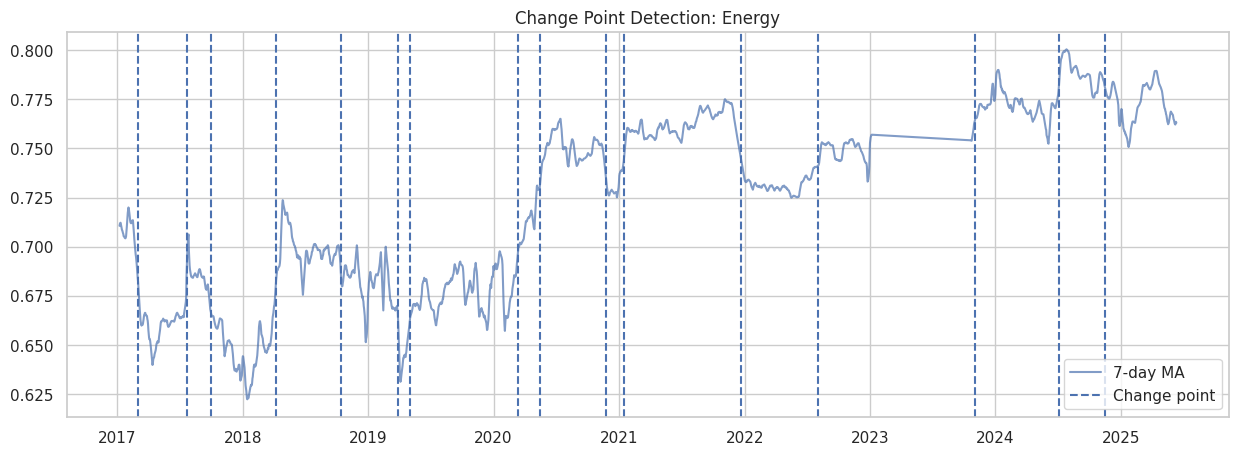

In [50]:
# valence
if "valence" in df_daily.columns:
    changepoint_plot(df_daily["valence"], "Change Point Detection: Valence", pen=10)
else:
    print("df_dailyに valence 列がありません。")

# energy
if "energy" in df_daily.columns:
    changepoint_plot(df_daily["energy"], "Change Point Detection: Energy", pen=10)
else:
    print("df_dailyに energy 列がありません。")

Valence pen=6 year counts


,count
2017,2
2018,4
2019,7
2020,2
2021,3
2022,2
2023,2
2024,3


Energy pen=6 year counts


,count
2017,4
2018,3
2019,2
2020,3
2021,3
2022,1
2023,1
2024,2
2025,1


Valence pen=10 year counts


,count
2017,2
2018,4
2019,6
2020,2
2021,2
2022,2
2023,1
2024,3


Energy pen=10 year counts


,count
2017,3
2018,2
2019,2
2020,3
2021,2
2022,1
2023,1
2024,2


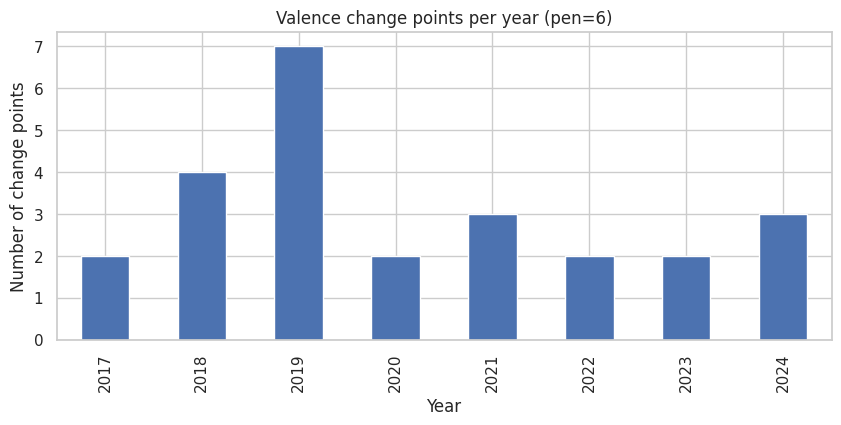

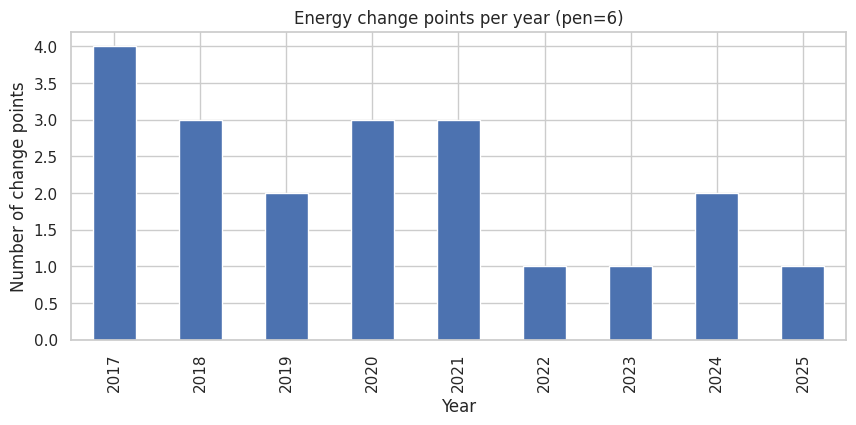

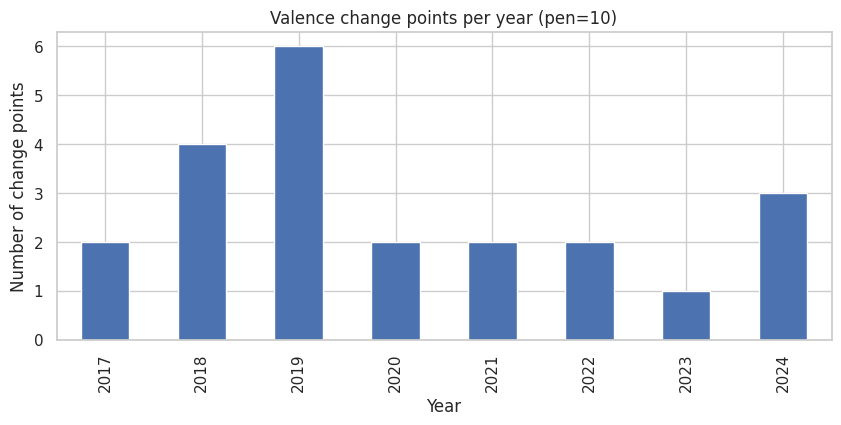

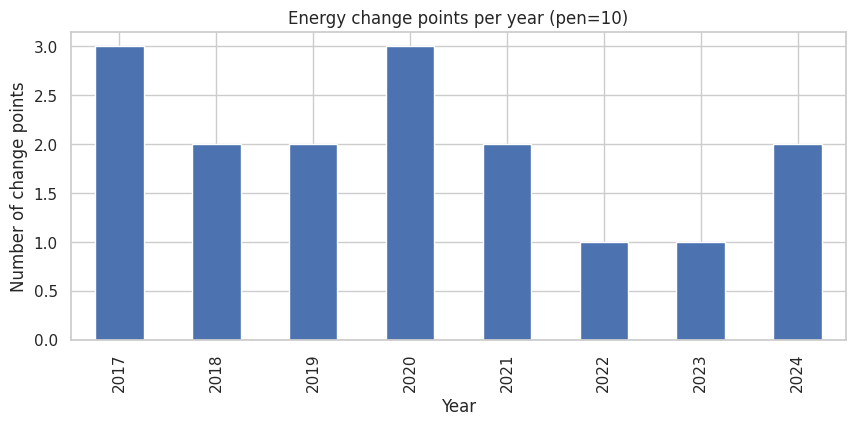

Robust (intersection) Valence year counts


,count
2017,2
2018,4
2019,6
2020,2
2021,2
2022,2
2024,3


Robust (intersection) Energy year counts


,count
2017,3
2018,2
2019,2
2020,3
2021,1
2022,1
2023,1
2024,1


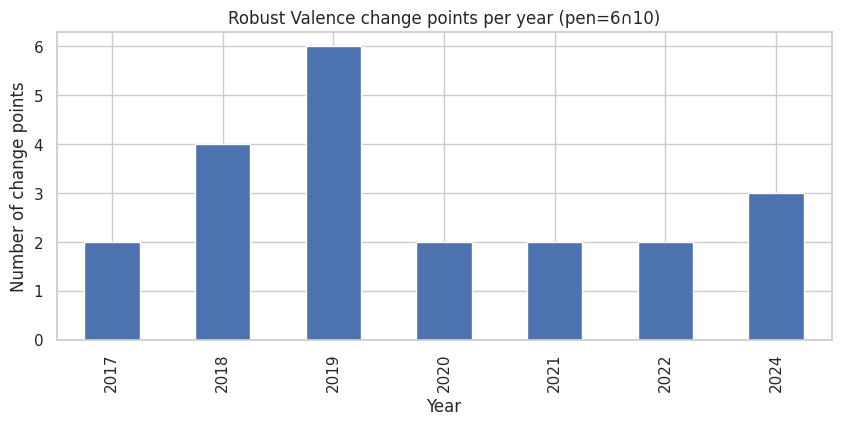

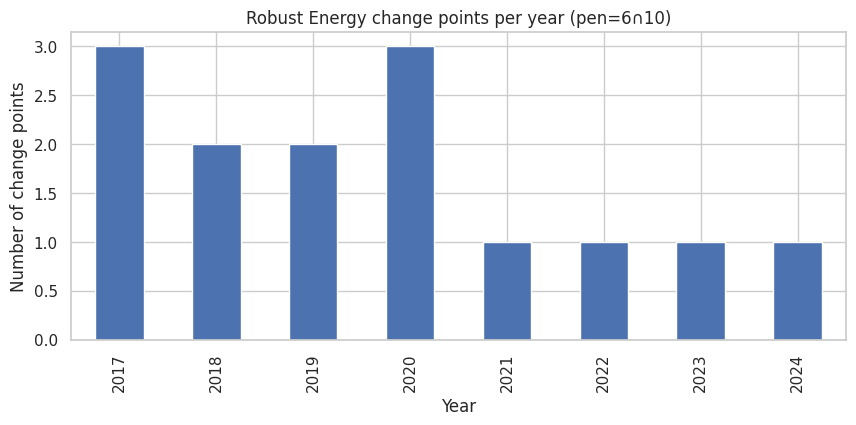

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# --- ここにあなたの出力（文字列）をそのままコピペしても良いが、
# 既に Python 変数で持っていない前提で「日付リスト」を直接書く方式にします ---

valence_cp_6 = [
"2017-05-02","2017-10-04","2018-01-02","2018-01-17","2018-04-17","2018-12-03",
"2019-01-02","2019-02-11","2019-05-02","2019-06-06","2019-07-21","2019-10-09","2019-12-08",
"2020-06-25","2020-10-18","2021-01-16","2021-06-05","2021-10-18",
"2022-04-26","2022-10-28","2023-04-11","2023-08-09","2024-04-15","2024-06-24","2024-10-12"
]

energy_cp_6 = [
"2017-03-03","2017-07-21","2017-09-29","2017-12-03","2018-02-11","2018-04-07","2018-10-14",
"2019-03-28","2019-05-02","2020-03-12","2020-05-16","2020-11-22",
"2021-01-16","2021-08-14","2021-12-17","2022-08-04",
"2023-11-02","2024-07-04","2024-12-21","2025-02-19"
]

valence_cp_10 = [
"2017-05-02","2017-10-04","2018-01-02","2018-01-17","2018-04-17","2018-12-03",
"2019-02-11","2019-05-02","2019-06-06","2019-07-21","2019-10-09","2019-12-08",
"2020-06-25","2020-10-18","2021-01-16","2021-10-18",
"2022-04-26","2022-10-28","2023-06-15","2024-04-15","2024-06-24","2024-10-12"
]

energy_cp_10 = [
"2017-03-03","2017-07-21","2017-09-29","2018-04-07","2018-10-14",
"2019-03-28","2019-05-02",
"2020-03-12","2020-05-16","2020-11-22",
"2021-01-16","2021-12-22","2022-08-04","2023-11-02","2024-07-04","2024-11-16"
]

def year_counts(date_list):
    s = pd.to_datetime(pd.Series(date_list))
    return s.dt.year.value_counts().sort_index()

def plot_counts(counts, title):
    plt.figure(figsize=(10,4))
    counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Number of change points")
    plt.show()

# ---- 集計 ----
vc6 = year_counts(valence_cp_6)
ec6 = year_counts(energy_cp_6)
vc10 = year_counts(valence_cp_10)
ec10 = year_counts(energy_cp_10)

print("Valence pen=6 year counts")
display(vc6.to_frame("count"))

print("Energy pen=6 year counts")
display(ec6.to_frame("count"))

print("Valence pen=10 year counts")
display(vc10.to_frame("count"))

print("Energy pen=10 year counts")
display(ec10.to_frame("count"))

# ---- 可視化 ----
plot_counts(vc6,  "Valence change points per year (pen=6)")
plot_counts(ec6,  "Energy change points per year (pen=6)")
plot_counts(vc10, "Valence change points per year (pen=10)")
plot_counts(ec10, "Energy change points per year (pen=10)")

# ---- おまけ：頑健点（pen=6と10の共通）を年別に見る ----
robust_valence = sorted(set(valence_cp_6) & set(valence_cp_10))
robust_energy  = sorted(set(energy_cp_6)  & set(energy_cp_10))

rv = year_counts(robust_valence)
re = year_counts(robust_energy)

print("Robust (intersection) Valence year counts")
display(rv.to_frame("count"))

print("Robust (intersection) Energy year counts")
display(re.to_frame("count"))

plot_counts(rv, "Robust Valence change points per year (pen=6∩10)")
plot_counts(re, "Robust Energy change points per year (pen=6∩10)")


Valence level-shift table (window=±30 days): n=21


,date,year,period,left_mean,right_mean,delta(right-left),abs_delta
0,2017-05-02,2017,Pre,0.520492,0.557220,0.036727,0.036727
1,2017-10-04,2017,Pre,0.553523,0.541212,-0.012311,0.012311
2,2018-01-02,2018,Pre,0.533532,0.473745,-0.059786,0.059786
3,2018-01-17,2018,Pre,0.508867,0.465127,-0.043740,0.043740
4,2018-04-17,2018,Pre,0.457229,0.501489,0.044260,0.044260
5,2018-12-03,2018,Pre,0.513960,0.548900,0.034940,0.034940
6,2019-02-11,2019,Pre,0.521015,0.484505,-0.036509,0.036509
7,2019-05-02,2019,Pre,0.490737,0.522474,0.031738,0.031738
8,2019-06-06,2019,Pre,0.527280,0.562329,0.035049,0.035049
9,2019-07-21,2019,Pre,0.569745,0.589249,0.019504,0.019504


Energy level-shift table (window=±30 days): n=14


,date,year,period,left_mean,right_mean,delta(right-left),abs_delta
0,2017-03-03,2017,Pre,0.701494,0.661691,-0.039803,0.039803
1,2017-07-21,2017,Pre,0.666875,0.689854,0.022979,0.022979
2,2017-09-29,2017,Pre,0.678720,0.661843,-0.016877,0.016877
3,2018-04-07,2018,Pre,0.659974,0.706819,0.046845,0.046845
4,2018-10-14,2018,Pre,0.694540,0.685891,-0.008649,0.008649
5,2019-03-28,2019,Pre,0.670758,0.643593,-0.027165,0.027165
6,2019-05-02,2019,Pre,0.647004,0.669373,0.022368,0.022368
7,2020-03-12,2020,COVID,0.682306,0.707298,0.024992,0.024992
8,2020-05-16,2020,COVID,0.722297,0.749308,0.027011,0.027011
9,2020-11-22,2020,COVID,0.748847,0.727838,-0.021009,0.021009



Top Valence shifts by |delta|


,date,year,period,left_mean,right_mean,delta(right-left),abs_delta
2,2018-01-02,2018,Pre,0.533532,0.473745,-0.059786,0.059786
13,2020-10-18,2020,COVID,0.613702,0.565354,-0.048348,0.048348
4,2018-04-17,2018,Pre,0.457229,0.501489,0.044260,0.044260
3,2018-01-17,2018,Pre,0.508867,0.465127,-0.043740,0.043740
0,2017-05-02,2017,Pre,0.520492,0.557220,0.036727,0.036727
6,2019-02-11,2019,Pre,0.521015,0.484505,-0.036509,0.036509
8,2019-06-06,2019,Pre,0.527280,0.562329,0.035049,0.035049
5,2018-12-03,2018,Pre,0.513960,0.548900,0.034940,0.034940
14,2021-01-16,2021,COVID,0.567724,0.600663,0.032939,0.032939
7,2019-05-02,2019,Pre,0.490737,0.522474,0.031738,0.031738



Top Energy shifts by |delta|


,date,year,period,left_mean,right_mean,delta(right-left),abs_delta
3,2018-04-07,2018,Pre,0.659974,0.706819,0.046845,0.046845
0,2017-03-03,2017,Pre,0.701494,0.661691,-0.039803,0.039803
5,2019-03-28,2019,Pre,0.670758,0.643593,-0.027165,0.027165
8,2020-05-16,2020,COVID,0.722297,0.749308,0.027011,0.027011
13,2024-07-04,2024,Post,0.772652,0.798091,0.025439,0.025439
7,2020-03-12,2020,COVID,0.682306,0.707298,0.024992,0.024992
10,2021-01-16,2021,COVID,0.735669,0.758779,0.023110,0.023110
1,2017-07-21,2017,Pre,0.666875,0.689854,0.022979,0.022979
6,2019-05-02,2019,Pre,0.647004,0.669373,0.022368,0.022368
9,2020-11-22,2020,COVID,0.748847,0.727838,-0.021009,0.021009


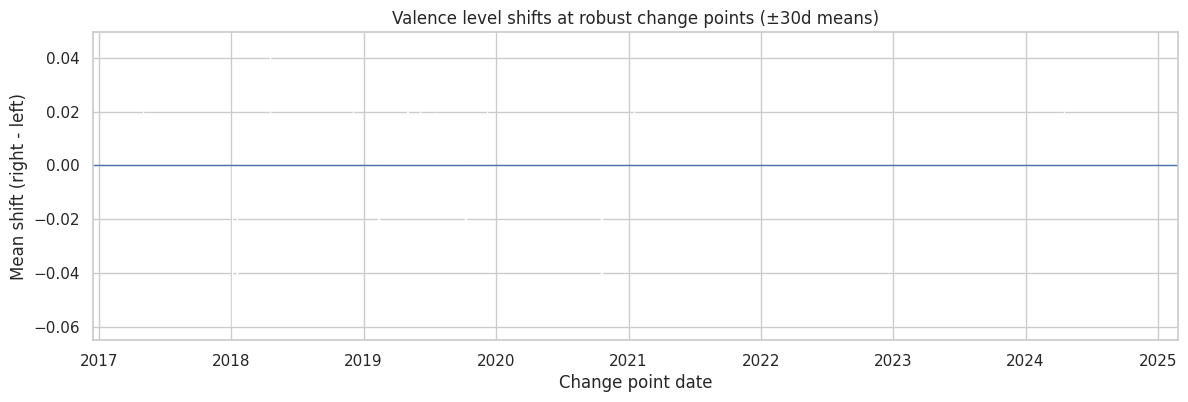

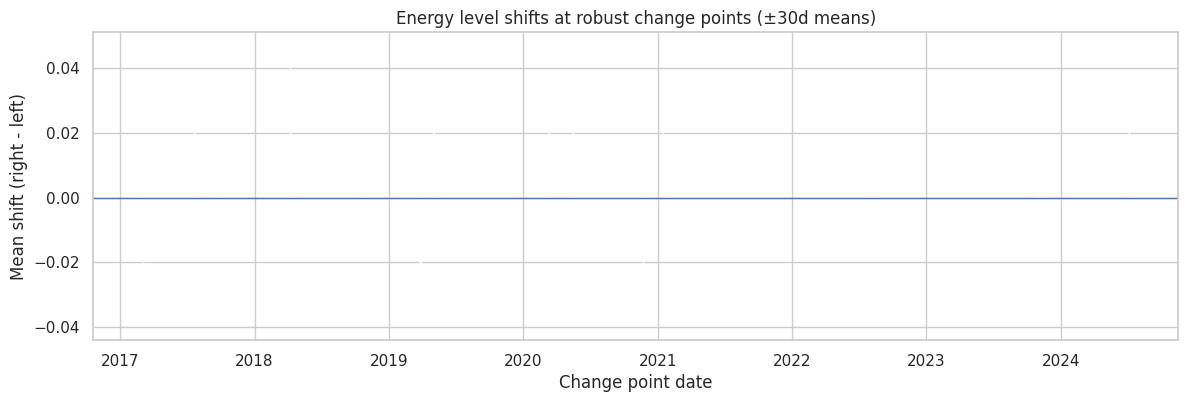


Valence: mean(|delta|) by year


,year,count,mean,median,max
0,2017,2,0.024519,0.024519,0.036727
1,2018,4,0.045682,0.044000,0.059786
2,2019,6,0.030540,0.031666,0.036509
3,2020,2,0.029423,0.029423,0.048348
4,2021,2,0.022543,0.022543,0.032939
5,2022,2,0.010723,0.010723,0.014886
6,2024,3,0.019451,0.017961,0.022924



Valence: mean(|delta|) by period


,period,count,mean,median,max
0,COVID,4,0.025983,0.022543,0.048348
1,Mid,2,0.010723,0.010723,0.014886
2,Post,3,0.019451,0.017961,0.022924
3,Pre,12,0.034584,0.034995,0.059786



Energy: mean(|delta|) by year


,year,count,mean,median,max
0,2017,3,0.026553,0.022979,0.039803
1,2018,2,0.027747,0.027747,0.046845
2,2019,2,0.024767,0.024767,0.027165
3,2020,3,0.024337,0.024992,0.027011
4,2021,1,0.023110,0.023110,0.023110
5,2022,1,0.012888,0.012888,0.012888
6,2023,1,0.013416,0.013416,0.013416
7,2024,1,0.025439,0.025439,0.025439



Energy: mean(|delta|) by period


,period,count,mean,median,max
0,COVID,4,0.024030,0.024051,0.027011
1,Mid,1,0.012888,0.012888,0.012888
2,Post,2,0.019428,0.019428,0.025439
3,Pre,7,0.026384,0.022979,0.046845


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- あなたの頑健点（pen=6∩10）をそのまま使う ---
robust_valence = [
"2017-05-02","2017-10-04","2018-01-02","2018-01-17","2018-04-17","2018-12-03",
"2019-02-11","2019-05-02","2019-06-06","2019-07-21","2019-10-09","2019-12-08",
"2020-06-25","2020-10-18","2021-01-16","2021-10-18","2022-04-26","2022-10-28",
"2024-04-15","2024-06-24","2024-10-12"
]

robust_energy = [
"2017-03-03","2017-07-21","2017-09-29","2018-04-07","2018-10-14",
"2019-03-28","2019-05-02","2020-03-12","2020-05-16","2020-11-22",
"2021-01-16","2022-08-04","2023-11-02","2024-07-04"
]

# 期間ラベル（既存の定義と合わせる）
def period3(y):
    if y <= 2019: return "Pre"
    if 2020 <= y <= 2021: return "COVID"
    if y == 2022: return "Mid"
    return "Post"

def level_shift_table(series, cp_dates, window_days=30):
    """
    series: df_daily["valence"] 等（DatetimeIndex）
    cp_dates: ["YYYY-MM-DD", ...]
    window_days: 前後の平均をとる窓（±window_days）
    """
    s = series.dropna().copy()
    idx_min, idx_max = s.index.min(), s.index.max()
    rows = []

    for d in pd.to_datetime(cp_dates):
        left_start  = d - pd.Timedelta(days=window_days)
        left_end    = d - pd.Timedelta(days=1)
        right_start = d
        right_end   = d + pd.Timedelta(days=window_days)

        # 範囲がデータ外ならスキップ
        if left_start < idx_min or right_end > idx_max:
            continue

        left = s.loc[left_start:left_end]
        right = s.loc[right_start:right_end]
        if len(left) < window_days*0.7 or len(right) < window_days*0.7:
            # 欠損で窓がスカスカなら除外（しきい値は任意）
            continue

        left_mean = float(left.mean())
        right_mean = float(right.mean())
        delta = right_mean - left_mean

        rows.append({
            "date": d.date(),
            "year": d.year,
            "period": period3(d.year),
            "left_mean": left_mean,
            "right_mean": right_mean,
            "delta(right-left)": delta,
            "abs_delta": abs(delta)
        })

    df = pd.DataFrame(rows).sort_values("date")
    return df

# --- Valence / Energy の変化点レベル差 ---
W = 30

df_shift_val = level_shift_table(df_daily["valence"], robust_valence, window_days=W)
df_shift_eng = level_shift_table(df_daily["energy"], robust_energy, window_days=W)

print(f"Valence level-shift table (window=±{W} days): n={len(df_shift_val)}")
display(df_shift_val)

print(f"Energy level-shift table (window=±{W} days): n={len(df_shift_eng)}")
display(df_shift_eng)

# --- 影響が大きい順（絶対値） ---
print("\nTop Valence shifts by |delta|")
display(df_shift_val.sort_values("abs_delta", ascending=False).head(10))

print("\nTop Energy shifts by |delta|")
display(df_shift_eng.sort_values("abs_delta", ascending=False).head(10))

# --- 可視化：deltaの時系列（棒） ---
def plot_delta(df, title):
    if df.empty:
        print(title, ": empty")
        return
    x = pd.to_datetime(df["date"])
    y = df["delta(right-left)"].values
    plt.figure(figsize=(14,4))
    plt.bar(x, y)
    plt.axhline(0, linewidth=1)
    plt.title(title)
    plt.xlabel("Change point date")
    plt.ylabel("Mean shift (right - left)")
    plt.show()

plot_delta(df_shift_val, f"Valence level shifts at robust change points (±{W}d means)")
plot_delta(df_shift_eng, f"Energy level shifts at robust change points (±{W}d means)")

# --- 年別・期間別の要約（平均絶対変化量） ---
def summary(df, name):
    if df.empty:
        return
    print(f"\n{name}: mean(|delta|) by year")
    display(df.groupby("year")["abs_delta"].agg(["count","mean","median","max"]).reset_index())

    print(f"\n{name}: mean(|delta|) by period")
    display(df.groupby("period")["abs_delta"].agg(["count","mean","median","max"]).reset_index())

summary(df_shift_val, "Valence")
summary(df_shift_eng, "Energy")


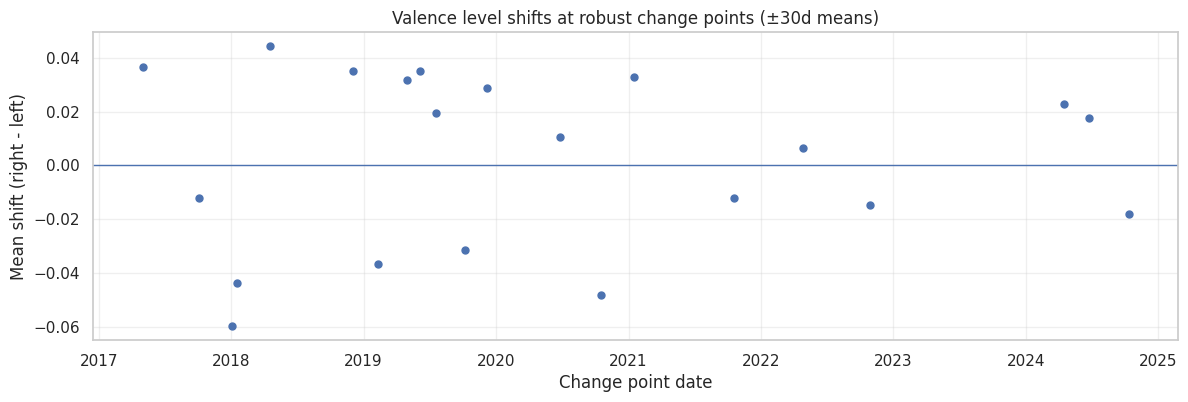

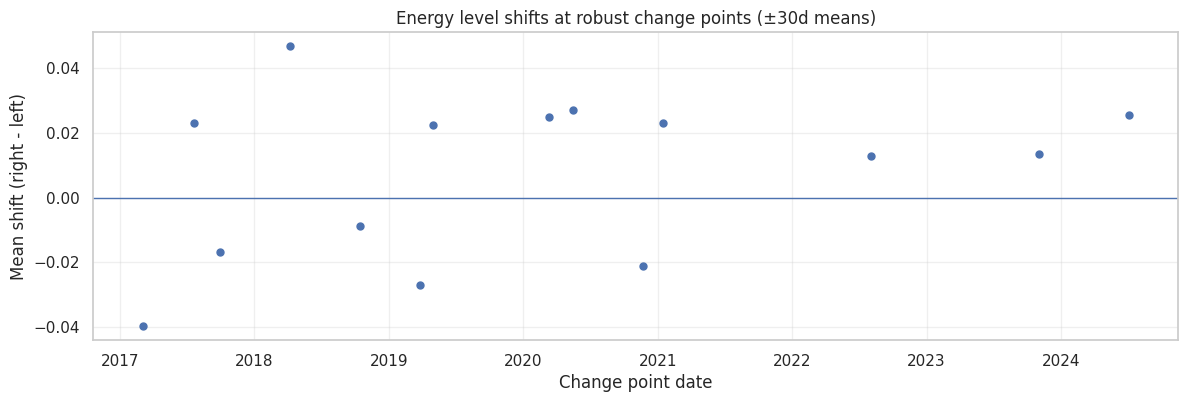

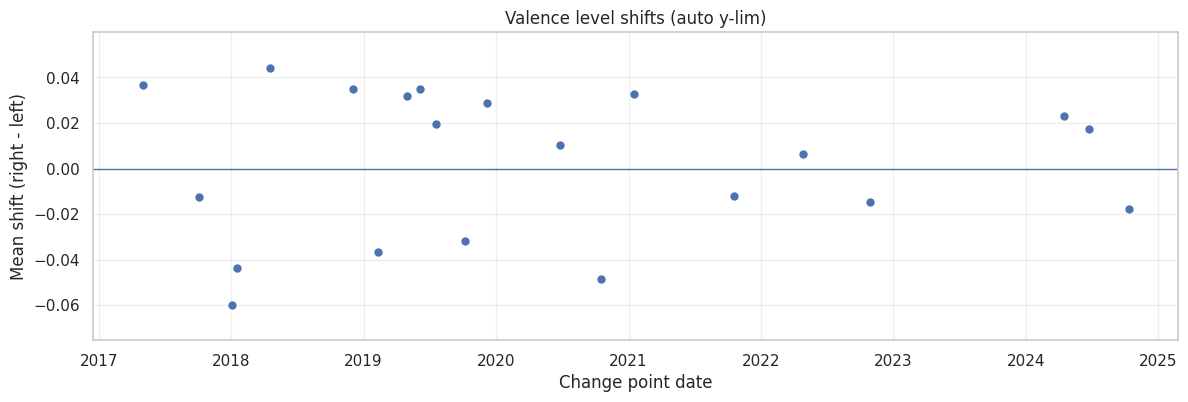

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_delta_scatter(df, title):
    x = pd.to_datetime(df["date"])
    y = df["delta(right-left)"].astype(float)

    plt.figure(figsize=(14,4))
    plt.scatter(x, y, s=25)      # 点
    plt.axhline(0, linewidth=1) # 0ライン
    plt.title(title)
    plt.xlabel("Change point date")
    plt.ylabel("Mean shift (right - left)")
    plt.grid(True, alpha=0.3)
    plt.show()

plot_delta_scatter(df_shift_val, "Valence level shifts at robust change points (±30d means)")
plot_delta_scatter(df_shift_eng, "Energy level shifts at robust change points (±30d means)")
def plot_delta_scatter_autoy(df, title, pad_ratio=0.15):
    x = pd.to_datetime(df["date"])
    y = df["delta(right-left)"].astype(float)

    ymin, ymax = float(y.min()), float(y.max())
    pad = (ymax - ymin) * pad_ratio if ymax > ymin else 0.01

    plt.figure(figsize=(14,4))
    plt.scatter(x, y, s=25)
    plt.axhline(0, linewidth=1)
    plt.ylim(ymin - pad, ymax + pad)
    plt.title(title)
    plt.xlabel("Change point date")
    plt.ylabel("Mean shift (right - left)")
    plt.grid(True, alpha=0.3)
    plt.show()

plot_delta_scatter_autoy(df_shift_val, "Valence level shifts (auto y-lim)")


,var,level(post),p_level,slope(t_post),p_slope,R2
4,acousticness,-0.027716,2.579283e-06,5.602425e-07,0.951770,0.348997
3,danceability,-0.011664,3.081502e-03,2.547254e-05,0.000036,0.742467
1,energy,0.067086,6.233185e-46,-1.416843e-06,0.856817,0.813563
2,tempo,7.454866,2.506529e-19,1.145903e-03,0.405636,0.823155
0,valence,0.043754,3.628132e-07,-3.461127e-05,0.005488,0.624137


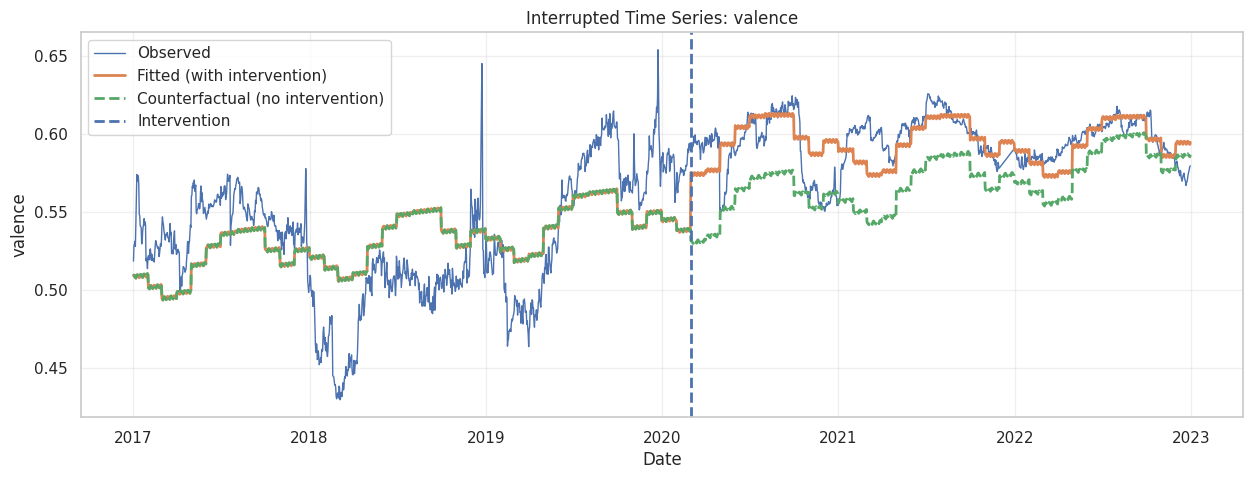

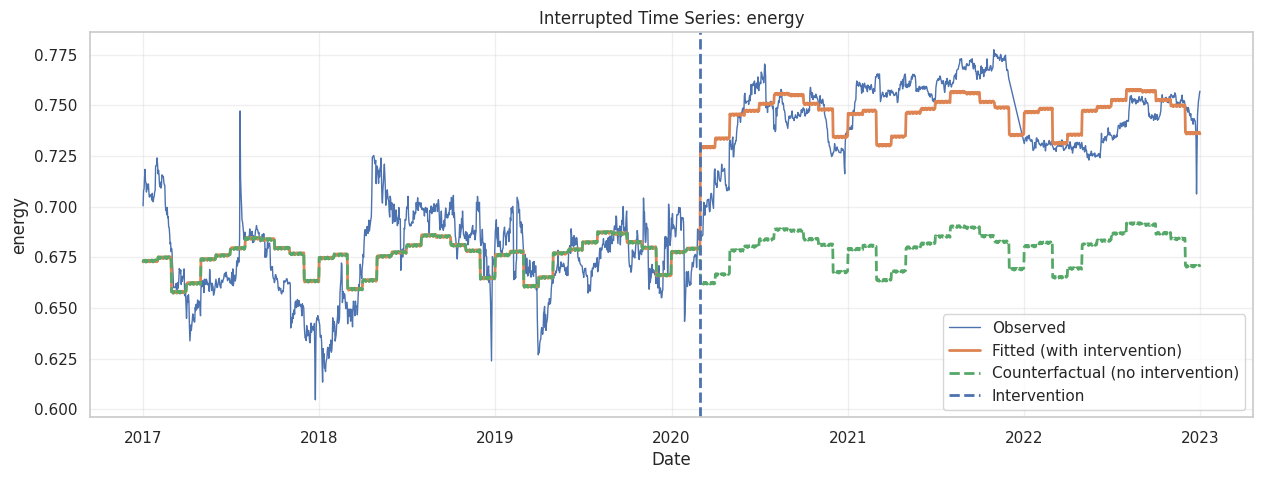

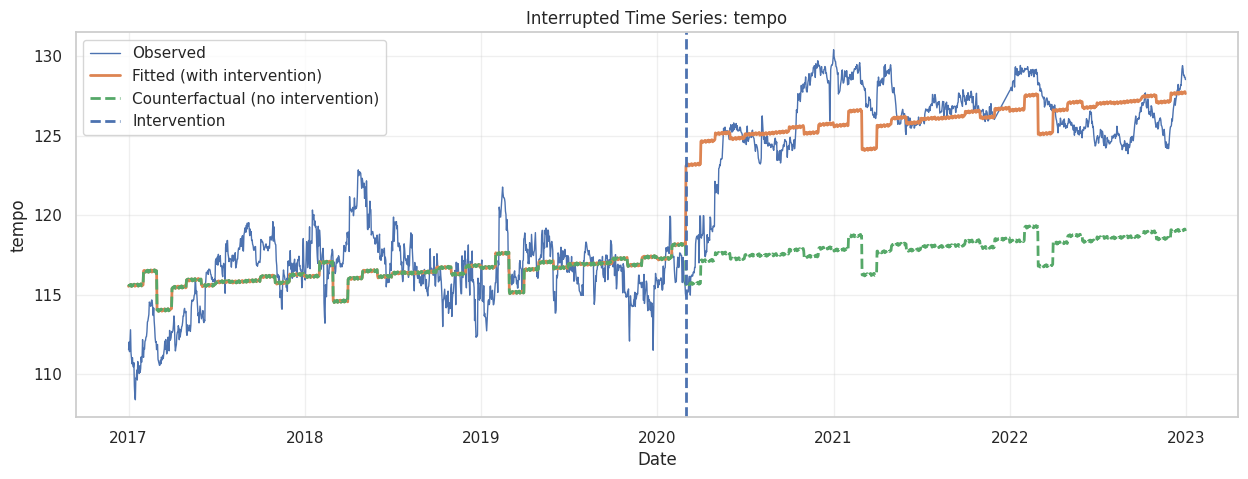

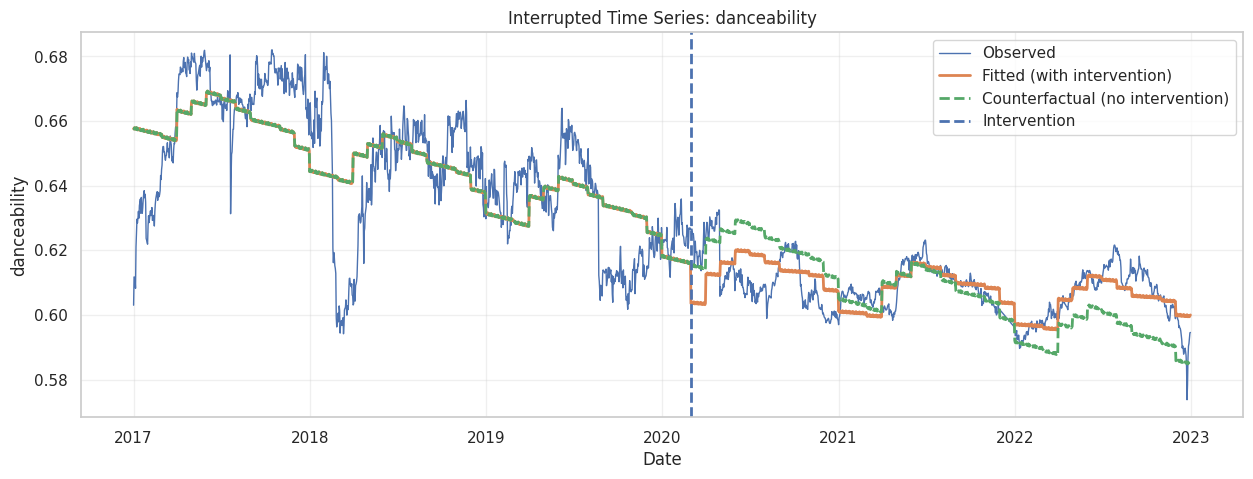

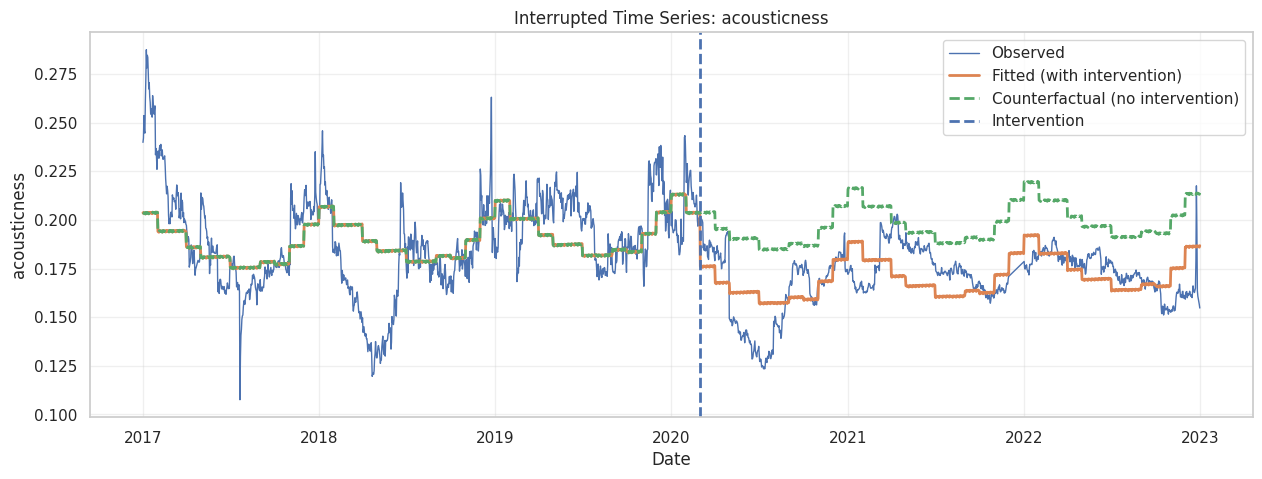

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

INTERVENTION_DATE = pd.Timestamp("2020-03-01")
START = "2017-01-01"
END   = "2022-12-31"

TARGETS = ["valence", "energy", "tempo", "danceability", "acousticness"]
TARGETS = [c for c in TARGETS if c in df_daily.columns]

# =========================
# 1) ITS用データ作成（数値化を明示）
# =========================
df_its = df_daily.loc[START:END].copy()

# 目的変数を強制数値化（object混入対策）
for c in TARGETS:
    df_its[c] = pd.to_numeric(df_its[c], errors="coerce")

df_its = df_its.dropna(subset=TARGETS)

if not (df_its.index.min() <= INTERVENTION_DATE <= df_its.index.max()):
    raise ValueError(f"介入日 {INTERVENTION_DATE.date()} が範囲外です: "
                     f"{df_its.index.min().date()} - {df_its.index.max().date()}")

# 時間軸
df_its["t"] = np.arange(len(df_its), dtype=float)

# 介入ダミー
df_its["post"] = (df_its.index >= INTERVENTION_DATE).astype(float)

# 介入後の時間（介入以前は0）
t0 = df_its.index.get_indexer([INTERVENTION_DATE], method="nearest")[0]
df_its["t_post"] = (df_its["t"] - df_its["t"].iloc[t0]) * df_its["post"]

# 季節性（曜日・月）
df_its["dow"] = df_its.index.dayofweek.astype(int)
df_its["month"] = df_its.index.month.astype(int)

X_base = df_its[["t", "post", "t_post"]].copy()

X_season = pd.get_dummies(
    df_its[["dow", "month"]],
    columns=["dow", "month"],
    drop_first=True
)

X = pd.concat([X_base, X_season], axis=1)

# ★ここが重要：全部数値にしてfloatへ（object排除）
X = X.apply(pd.to_numeric, errors="coerce").fillna(0.0)
X = sm.add_constant(X, has_constant="add")
X = X.astype(float)

# 念のためのチェック（objectが残ってたらここで見える）
obj_cols = X.columns[X.dtypes == "object"].tolist()
if obj_cols:
    print("Still object columns:", obj_cols)
    raise ValueError("Xにobject列が残っています")

# =========================
# 2) 推定（HAC）
# =========================
def fit_its(y_col, hac_lags=14):
    y = df_its[y_col].astype(float)
    # index整合（まれにズレるのを防ぐ）
    y_aligned, X_aligned = y.align(X, join="inner", axis=0)
    return sm.OLS(y_aligned.values, X_aligned.values).fit(
        cov_type="HAC", cov_kwds={"maxlags": hac_lags}
    ), X_aligned.columns

rows = []
models = {}

for col in TARGETS:
    m, xnames = fit_its(col, hac_lags=14)
    models[col] = (m, xnames)

    # 係数の位置を名前で取る
    name_to_i = {n:i for i,n in enumerate(xnames)}
    def get_coef(name):
        i = name_to_i.get(name, None)
        return (m.params[i], m.pvalues[i]) if i is not None else (np.nan, np.nan)

    b_post, p_post = get_coef("post")
    b_tpost, p_tpost = get_coef("t_post")

    rows.append({
        "var": col,
        "level(post)": b_post,
        "p_level": p_post,
        "slope(t_post)": b_tpost,
        "p_slope": p_tpost,
        "R2": m.rsquared
    })

res_its = pd.DataFrame(rows).sort_values("var")
display(res_its)

# =========================
# 3) 可視化（観測・当てはめ・反実仮想）
# =========================
def predict_with_matrix(m, Xmat):
    return m.predict(Xmat.values)

def plot_its(y_col):
    m, xnames = models[y_col]
    y = df_its[y_col].astype(float)

    # 当てはめ
    yhat = predict_with_matrix(m, X)

    # 反実仮想（post=0, t_post=0）
    X_cf = X.copy()
    if "post" in X_cf.columns:
        X_cf.loc[df_its.index >= INTERVENTION_DATE, "post"] = 0.0
    if "t_post" in X_cf.columns:
        X_cf.loc[df_its.index >= INTERVENTION_DATE, "t_post"] = 0.0
    yhat_cf = predict_with_matrix(m, X_cf)

    plt.figure(figsize=(15,5))
    plt.plot(df_its.index, y.values, label="Observed", linewidth=1)
    plt.plot(df_its.index, yhat, label="Fitted (with intervention)", linewidth=2)
    plt.plot(df_its.index, yhat_cf, label="Counterfactual (no intervention)", linewidth=2, linestyle="--")
    plt.axvline(INTERVENTION_DATE, linestyle="--", linewidth=2, label="Intervention")
    plt.title(f"Interrupted Time Series: {y_col}")
    plt.xlabel("Date")
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

for col in TARGETS:
    plot_its(col)
